In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# ACSE Module 8 - Afternoon Session 1:
----
# Datasets, Baselines, k-Nearest-Neighbors, PCA

In the following exercise you will explore a number of datasets, investigate their complexity and implement a simple baseline classifier for each of them.

For each of the datasets in the list the following items:
- Type of Data
- Number of Training Examples / Test Examples
- Task Type (Classification, Regression, ...)

Datasets: 
- [Iris](http://archive.ics.uci.edu/ml/datasets/iris)
- [Titanic Survivors](https://www.kaggle.com/c/titanic)
- [MNIST](http://yann.lecun.com/exdb/mnist/)
- [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
- [CIFAR10, CIFAR100](https://www.cs.toronto.edu/~kriz/cifar.html)
- [SVHN](http://ufldl.stanford.edu/housenumbers/)
- [ILSVC](http://www.image-net.org/challenges/LSVRC/2014/)
- [MSCOCO-18](http://cocodataset.org/#home)

For the [MNIST](http://yann.lecun.com/exdb/mnist/) and [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) Dataset perform the following:
1. Load the datasets from ```torchvision.datasets```
2. Perform a two-component PCA and visualize the datapoints with class-labels as colors
    - No need to roll your own PCA for this. Just use ```sklearn.decomposition.PCA```
    - Compare the datasets in the lower-dimensional space, what do you observe?
3. Read about the "Curse of dimensionality" Chapter 6 [here](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) 
4. k-Means and k-Nearest Neighbor techniques are often confused:
    - What are their main difference?
    - What do you have to be careful with in the case of k-NN? Think about high-dimensional data such as images.
5. Use a k-Nearest-Neighbor classifier ```sklearn.neighbors.KNeighborsClassifier```to create a baseline for each dataset.
    - Given that you've read chapter 6 in (3), propose a way to improve k-NN for image datasets and apply.
6. Do the results of the baseline reflect your findings of investigating the lower-dimensional space of images?
7. Use the [Embedding Projector](https://projector.tensorflow.org/) to investigate the PCA space of MNIST.
    - Is PCA able to seperate the classes? Does PCA capture any other features of the data?
    - Bonus: Read about t-SNE, an unsupervised clustering method, [here](https://distill.pub/2016/misread-tsne/) and perform the same excercise in the projector using t-SNE, how does t-SNE compare against PCA?


### Loading MNIST and Fashion-MNIST

In [ ]:
from torchvision.datasets import MNIST, FashionMNIST

mnist = MNIST("./mnist", download=True, train=True)
fashion_mnist = FashionMNIST("./fmnist", download=True, train=True)


mnist_test = MNIST("./mnist", download=True, train=False)
fashion_mnist_test = FashionMNIST("./fmnist", download=True, train=False)

### Create a PCA of MNIST and Fashion-MNIST

NameError: name 'mnist' is not defined

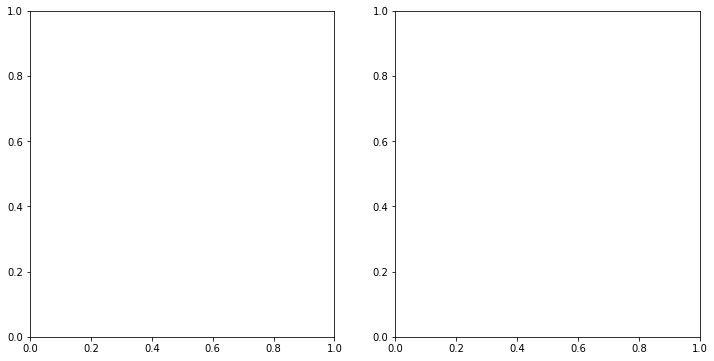

In [3]:
from sklearn.decomposition import PCA

fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
for ax, dataset, X, y in zip(axarr, ["MNIST", "FashionMNIST"], [mnist.train_data, fashion_mnist.train_data], [mnist.train_labels, fashion_mnist.train_labels]):
    pca_model = PCA(n_components=2, random_state=0)
    X_pca = pca_model.fit_transform(X.view(-1, 28*28))
    ax.scatter(X_pca[::10, 0], X_pca[::10, 1], c=y[::10], s=10)
    ax.set_title(dataset)

### Create a k-NN Baseline Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

for dataset, X_train, y_train, X_test, y_test in zip(["MNIST", "FashionMNIST"], 
                                                     [mnist.train_data, fashion_mnist.train_data], 
                                                     [mnist.train_labels, fashion_mnist.train_labels],
                                                     [mnist_test.test_data, fashion_mnist_test.test_data], 
                                                     [mnist_test.test_labels, fashion_mnist_test.test_labels]):

    X_train = X_train.reshape(-1, 784)
    X_test = X_test.reshape(-1, 784)

    transformer = PCA(n_components=10, random_state=0)
    print("Fitting", transformer)
    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
    print('Fitting', clf)
    clf.fit(X_train, y_train)
    print('Evaluating', clf)

    test_score = clf.score(X_test, y_test)
    print(dataset+' Test accuracy:', test_score)

Fitting PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)
Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
MNIST Test accuracy: 0.9289
Fitting PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)
Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
FashionMNIST Test accura

---